# **Exploratory Data Analysis - Getting familiar with the dataset**

### Importing libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn import tree, metrics

plt.show()
sb.set() # set the default Seaborn style for graphics

dataframe = pd.read_excel('HeartDiseaseCleaned.xlsx', index_col=[0])
dataframe

C:\Users\garyq\AppData\Local\Temp\ipykernel_26852\2957292122.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,age,sex,chest_pain,rest_blood_pressure,cholesterol_level,diabetic,resting_ecg,max_heart_rate,exercise_angina,number
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,0
1,67,Male,asymptomatic,160,286,False,lv hypertrophy,108,True,2
2,67,Male,asymptomatic,120,229,False,lv hypertrophy,129,True,1
3,37,Male,non-anginal,130,250,False,normal,187,False,0
4,41,Female,atypical angina,130,204,False,lv hypertrophy,172,False,0
...,...,...,...,...,...,...,...,...,...,...
739,62,Male,asymptomatic,158,170,False,st-t abnormality,138,True,1
740,46,Male,asymptomatic,134,310,False,normal,126,False,2
741,54,Female,asymptomatic,127,333,True,st-t abnormality,154,False,1
742,55,Male,asymptomatic,122,223,True,st-t abnormality,100,False,2


#### Checking for null data - there is no NaN values so its fine to continue

In [2]:
#Double check there is no null data...
dataframe.isnull().sum()

age                    0
sex                    0
chest_pain             0
rest_blood_pressure    0
cholesterol_level      0
diabetic               0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
number                 0
dtype: int64

Quick Analysis of data types in the dataset - **2 bool**, **3 object** , **5 int**: **5 categorical** and **5 integer variables** 


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, 0 to 743
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  664 non-null    int64 
 1   sex                  664 non-null    object
 2   chest_pain           664 non-null    object
 3   rest_blood_pressure  664 non-null    int64 
 4   cholesterol_level    664 non-null    int64 
 5   diabetic             664 non-null    bool  
 6   resting_ecg          664 non-null    object
 7   max_heart_rate       664 non-null    int64 
 8   exercise_angina      664 non-null    bool  
 9   number               664 non-null    int64 
dtypes: bool(2), int64(5), object(3)
memory usage: 48.0+ KB


## Exploring our predictor variable, "number" - "number" represents the amount of heart diseases present in a person.

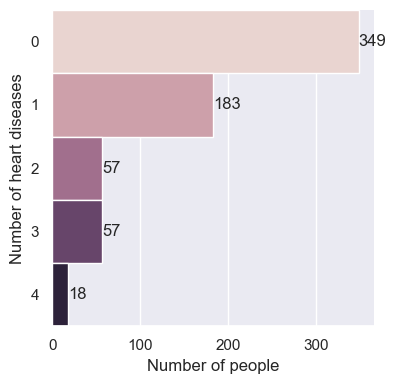

In [4]:
#Explore the variable we are trying to predict, number of heart diseases.
g = sb.catplot(y = 'number', data = dataframe, kind = "count" , hue = 'number' , legend = False , height = 4, width = 1)
g.set_axis_labels('Number of people' ,'Number of heart diseases')
ax = g.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{int((v.get_width()))}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge') 

## Since we are trying to predict if a person has a heart disease or not, we shall fill all the >= 1 under number as 1 so we end up with 1 or 0,  where 1 = heart disesase is present, 0 = heart disease is not present

In [5]:
dataframe['number'].values[dataframe['number'].values > 0] = 1

After changing "number" to 1 or 0, it is not a categorical variable instead of a numerical variable.

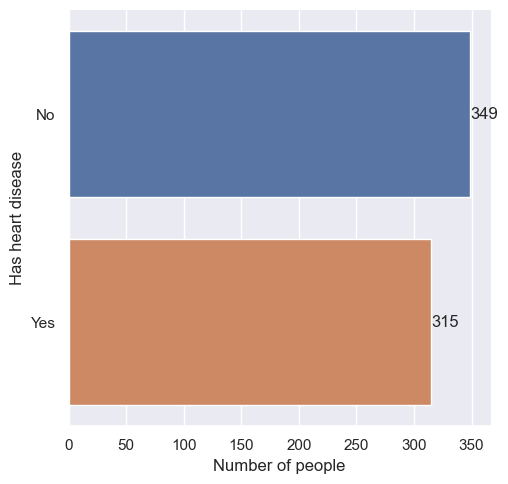

In [6]:
g = sb.catplot(y = 'number', data = dataframe, kind = "count" , hue = 'number' , legend = False)
g.set_yticklabels(labels=['No', 'Yes'])
g.set_axis_labels('Number of people' ,'Has heart disease')

ax = g.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{int((v.get_width()))}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge') 

# Lets start by exploring the Numerical Variables

In [7]:
numericframe = dataframe[['age' , 'rest_blood_pressure' , 'cholesterol_level' , 'max_heart_rate']].copy()
numericframe.describe()

,age,rest_blood_pressure,cholesterol_level,max_heart_rate
count,664.000000,664.000000,664.000000,664.000000
mean,52.631024,132.759036,246.307229,141.278614
std,9.442100,17.816792,57.561657,25.046787
min,28.000000,92.000000,85.000000,69.000000
25%,46.000000,120.000000,210.000000,123.000000
50%,54.000000,130.000000,239.500000,143.000000
75%,59.000000,140.000000,275.000000,160.000000
max,77.000000,200.000000,603.000000,202.000000


## Age

In [8]:
numericframe['age'].describe()

count    664.000000
mean      52.631024
std        9.442100
min       28.000000
25%       46.000000
50%       54.000000
75%       59.000000
max       77.000000
Name: age, dtype: float64

We can see the age range is between 28 to 77 years old with an average age of 52.6 ~ 53

C:\Users\garyq\AppData\Local\Temp\ipykernel_26852\3777868341.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(numericframe['age'], color='green')


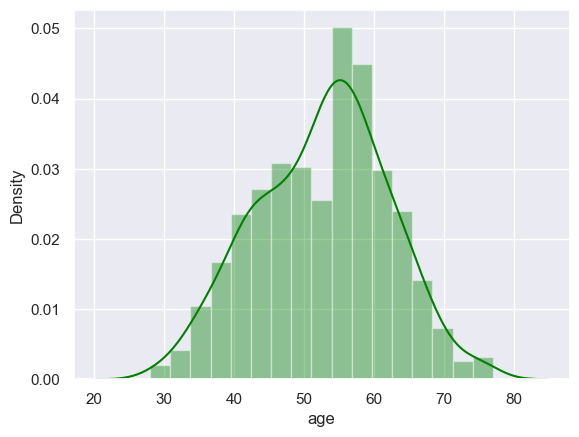

In [9]:
sb.distplot(numericframe['age'], color='green')
plt.show()

## Rest Blood Pressure (Blood Pressure of patient at rest state)

In [10]:
numericframe['rest_blood_pressure'].describe()

count    664.000000
mean     132.759036
std       17.816792
min       92.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: rest_blood_pressure, dtype: float64

Blood pressure of a normal person is < 120, patient with > 120 is diagnosed with high blood pressure/hypertension
the bp range is 92 to 200 with an average of 132.
atleast 25% of the records have normal bp. We can conclude that most patients in this data set have high blood pressure 


C:\Users\garyq\AppData\Local\Temp\ipykernel_26852\1146548111.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(numericframe['rest_blood_pressure'], color='green')


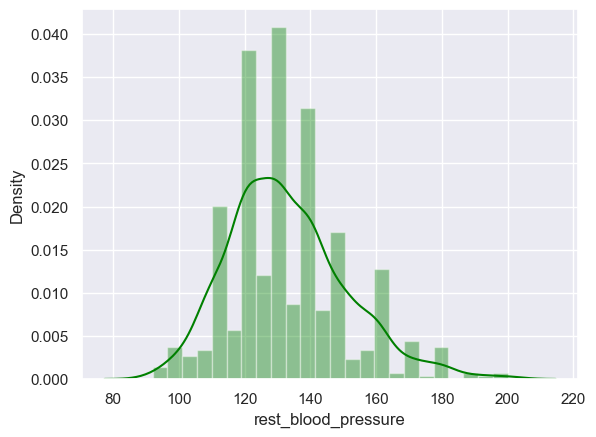

In [11]:
sb.distplot(numericframe['rest_blood_pressure'], color='green')
plt.show()

# Cholesterol levels

In [12]:
numericframe['cholesterol_level'].describe()

count    664.000000
mean     246.307229
std       57.561657
min       85.000000
25%      210.000000
50%      239.500000
75%      275.000000
max      603.000000
Name: cholesterol_level, dtype: float64

From an article related to information on cholesterol levels, <br> Professional, C. C. M. (n.d.). Cholesterol Numbers and What They Mean. Cleveland Clinic. https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean <br>

 **Healthy level** of cholesterol is **lower than 200** <br> Cholesterol ranges **from 85 to 603** with **average of 246** 
Looking at the dataset we can see that the cholesterol range is between 85 to 603 with an average of 246 and a standard deviation of 57. <br>Thus, we can conclude that most patients in this dataset have high levels of cholesterol.


C:\Users\garyq\AppData\Local\Temp\ipykernel_26852\733231530.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(numericframe['cholesterol_level'], color='green')


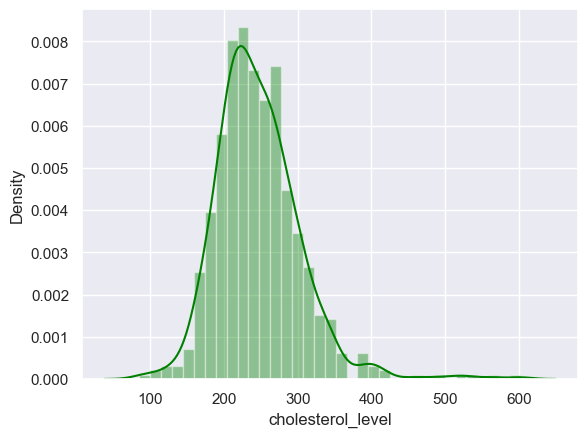

In [13]:
sb.distplot(numericframe['cholesterol_level'], color='green')
plt.show()

From the distplot, we can see that most people in the dataset has high levels of cholesterol. 

# Max Heart Rate

In [14]:
numericframe['max_heart_rate'].describe()

count    664.000000
mean     141.278614
std       25.046787
min       69.000000
25%      123.000000
50%      143.000000
75%      160.000000
max      202.000000
Name: max_heart_rate, dtype: float64

### heart rate range is **from 69 to 202** with an **average of 141**

C:\Users\garyq\AppData\Local\Temp\ipykernel_26852\307087213.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(numericframe['max_heart_rate'], color='green')


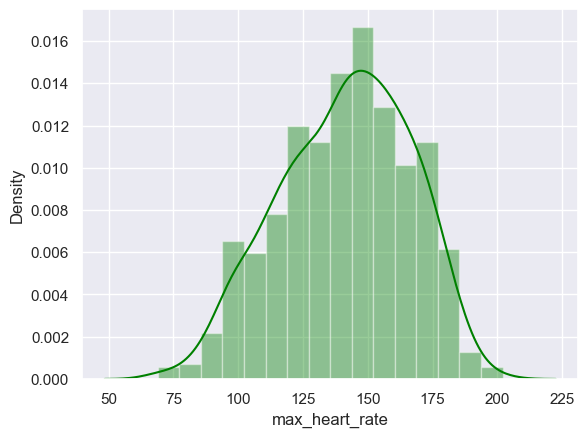

In [15]:
sb.distplot(numericframe['max_heart_rate'], color='green')
plt.show()

# Correlation between numerical variables to see if there are any relationships

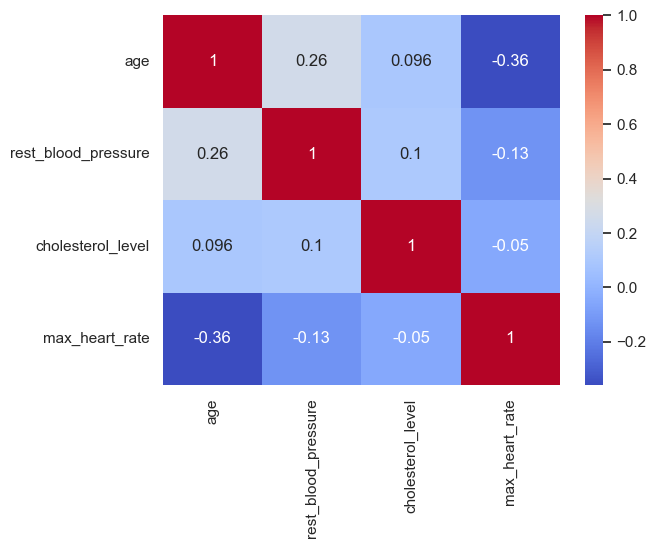

In [16]:
numericCorr = numericframe.corr()
sb.heatmap(numericCorr, cmap = "coolwarm", annot=True)
plt.show()

looking at the correlation matrix of these numerical variables. At first glance, there is no strong indication of any correlation between these variables. However, there is a weak negative correlation between age and heart rate with a value of -0.36 and a weak positive correlation between age and blood pressure with a value of 0.26.  Although the correlation is not strong, there might be a trend between age, blood pressure and heart rate. Suggesting that there might be an increase in blood pressure and a decrease in max heart rate as a person ages .



In [34]:
jointData = pd.concat([numericframe["max_heart_rate"], numericframe["age"]], axis = 1)
sb.jointplot(data = jointData, x = "age", y = "max_heart_rate", height = 12)
jointData.corr()

KeyError: 'max_heart_rate'

## Correlation betweeen the numerical data to heart disease 
number: 0 - No heart disease, 1 - Have heart disease <br>
At first glance, there is no strong indication of any correlation. However, age and max heart rate might have a slight correlation in predicting heart disease.

# Multivariate Data Analysis of Numerical Variables

<Axes: xlabel='number', ylabel='max_heart_rate'>

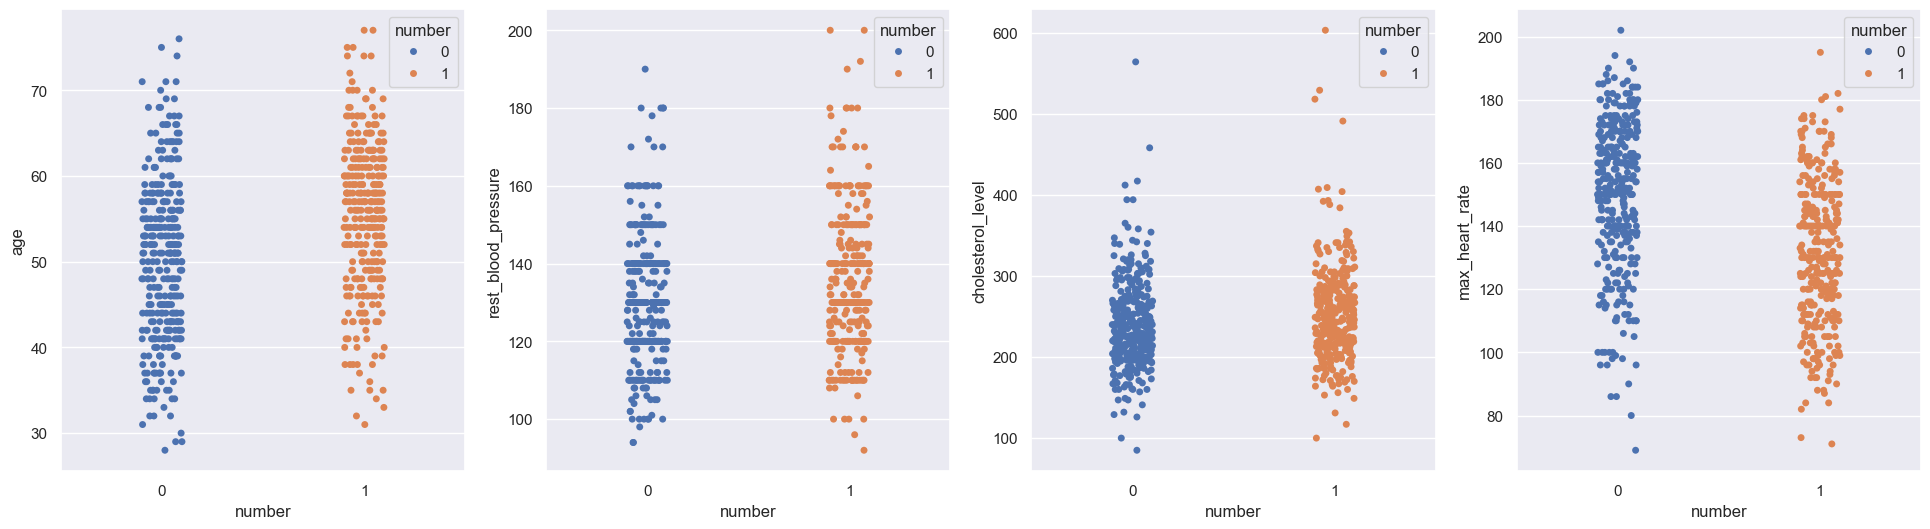

In [17]:
f, axes = plt.subplots(1, 4, figsize=(24, 6))

sb.stripplot(data=dataframe, x = 'number' , y = 'age' , hue = 'number', ax = axes[0])
sb.stripplot(data=dataframe, x = 'number' , y ='rest_blood_pressure', hue = 'number', ax = axes[1])
sb.stripplot(data=dataframe, x = 'number' , y ='cholesterol_level', hue = 'number', ax = axes[2])
sb.stripplot(data=dataframe, x = 'number' , y ='max_heart_rate', hue = 'number', ax = axes[3])

<Axes: xlabel='number', ylabel='max_heart_rate'>

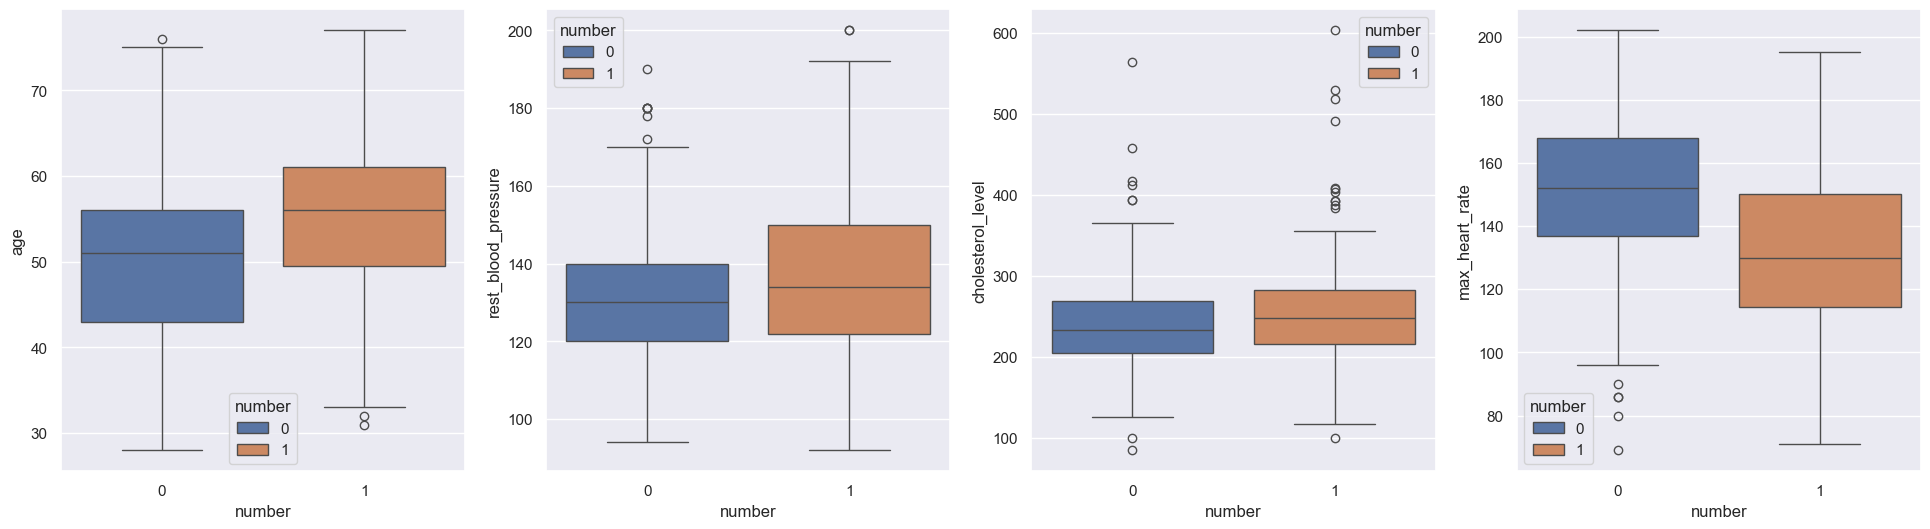

In [18]:
f, axes = plt.subplots(1, 4, figsize=(24, 6))

sb.boxplot(data=dataframe, x = 'number' , y = 'age' , hue = 'number', ax = axes[0])
sb.boxplot(data=dataframe, x = 'number' , y ='rest_blood_pressure', hue = 'number', ax = axes[1])
sb.boxplot(data=dataframe, x = 'number' , y ='cholesterol_level', hue = 'number', ax = axes[2])
sb.boxplot(data=dataframe, x = 'number' , y ='max_heart_rate', hue = 'number', ax = axes[3])

From the boxplots, we can see that **age** and **max heart rate** has a relationship with predicting the presence of heart disease

## Age

<Axes: xlabel='number', ylabel='age'>

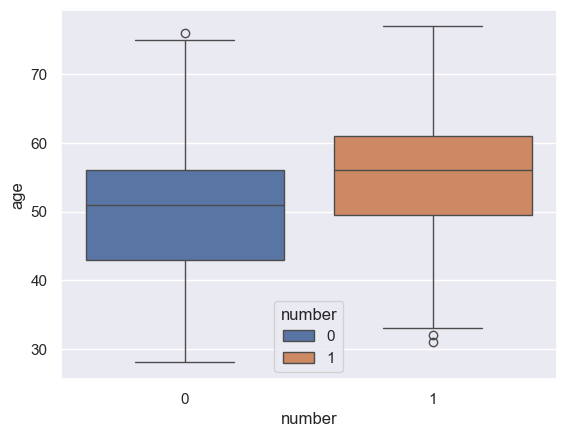

In [27]:
sb.boxplot(data=dataframe, x = 'number' , y = 'age' , hue = 'number')

Looking at an article regarding age,<br> (Stern, et al. 2003, October 7). How aging affects your heart. Aging and Diseases of the Heart. https://www.ahajournals.org/doi/full/10.1161/01.cir.0000086898.96021.b9 <br> <br>
 The article states that "With age, the function of the heart is influenced mainly by the decrease in elasticity and the ability to respond to changes in pressure (compliance) of the arterial system." This inevitalbily causes more stress to act on the heart as a person ages. This thus makes a person who is older to be more prone to heart diseases as the heart weakens over time.

## Max Heart Rate

<Axes: xlabel='number', ylabel='max_heart_rate'>

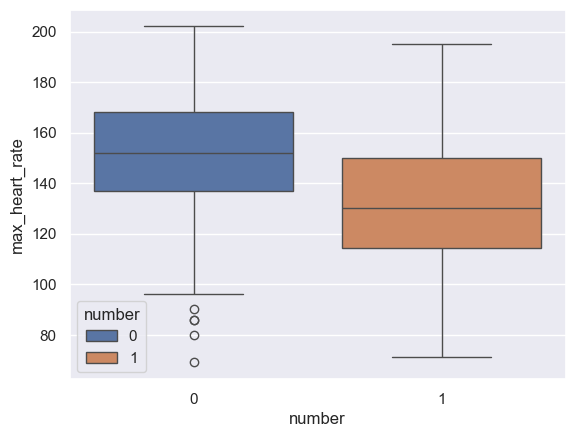

In [28]:
sb.boxplot(data=dataframe, x = 'number' , y ='max_heart_rate', hue = 'number')

Looking at an article regarding max heart rate, <br>(LeWine, H. E. 2023, June 13). What your heart rate is telling you. Harvard Health. https://www.health.harvard.edu/heart-health/what-your-heart-rate-is-telling-you#:~:text=Your%20maximum%20heart%20rate%20plays,of%20heart%20attack%20and%20death. <br><br>
The article states "The rate at which your heart is beating when it is working its hardest to meet your body's oxygen needs is your maximum heart rate." A higher maximum heart rate signifies a healthy heart which is able to circulate oxygen compared to a heart that has a lower heart rate which is unable to circulate enough oxygen to suit a bodys needs indicates a weaker heart that could have a higher chance of heart disease compared to a heart with a high heart rate.


# Exploring Categorical Variables

In [19]:
numericframe = dataframe[['chest_pain' , 'exercise_angina' , 'sex' , 'diabetic' ,'resting_ecg']].copy()
numericframe.describe()

,chest_pain,exercise_angina,sex,diabetic,resting_ecg
count,664,664,664,664,664
unique,4,2,2,2,3
top,asymptomatic,False,Male,False,normal
freq,334,414,493,563,400


# Exploring Chest Pain

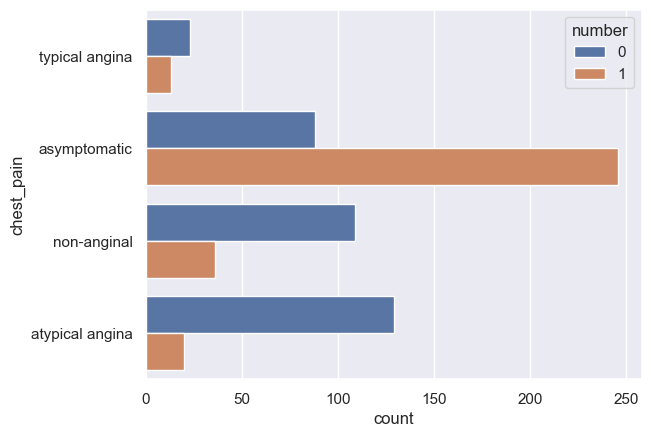

In [20]:
cp_plot = sb.countplot(data=dataframe, y = 'chest_pain' , hue = 'number')

**Typical angina (chest discomfort)**
No obvious relationship with heart disease <br>
**Asymptomatic (chest pain / discomfort without symptoms)**
People who experience asymptomatic chest pain have a high likelihood to have heart disease <br>
**Non-anginal (chest pain / discomfort without typical characteristics of angina)**
People who have non-anginal chest pain are less likely to have heart disease <br>
**Atypical angina (chest pain that does not fit typical patterns)**
People who have atypical angina are less likely to have chest pain <br>


# Exploring Exercise Angina - Angina refers to chest pain / discomfort. 
### Therefore Exercise Angina refers to chest pain / discomfort while exercising

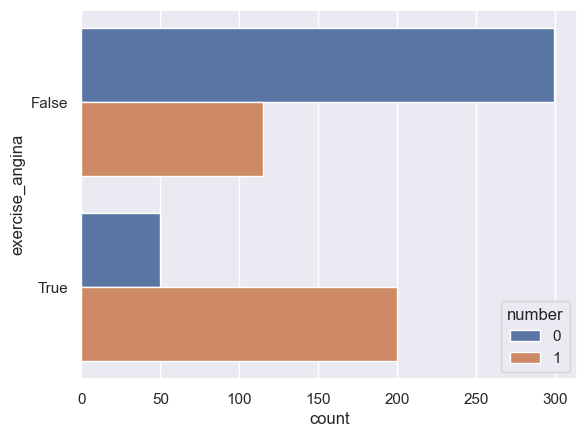

In [21]:
exan_plot = sb.countplot(data=dataframe, y = 'exercise_angina', hue = 'number')

**Exercise angina refers to chest pain when exercising**<br>
From the data we can see that **people who have exercise angina** are **more likely to have heart disease** than people who don’t have exercise angina. <br>
Having **exercise angina could therefore have a higher likelihood of heart disease** 


# Exploring Sex

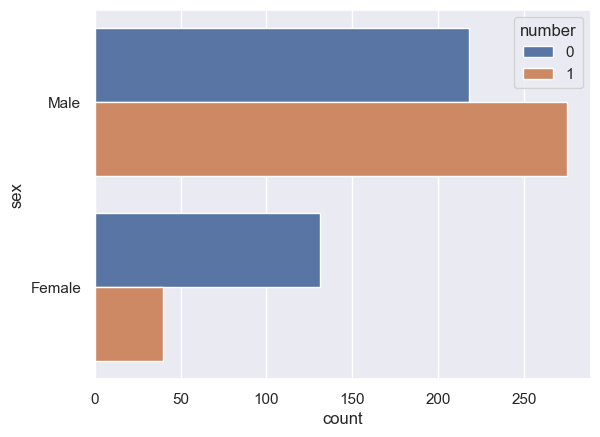

In [22]:
sex_plot = sb.countplot(data=dataframe, y = 'sex', hue = 'number')

It is possible that female / male could be a predictor of heart disease. However, since the male to female ratio is skewed, lets explore the percentage of females / males that have heart disease

### Analysing the percentage of male to female who have / do not have heart disease

In [23]:
MaleCount = (len(dataframe[dataframe['sex'] == 'Male']))
FemaleCount = (len(dataframe[dataframe['sex'] == 'Female']))

MaleHeartDisease = len(dataframe[(dataframe['sex'] == 'Male') & (dataframe['number'] > 0)])
MaleNoHeartDisease = len(dataframe[(dataframe['sex'] == 'Male') & (dataframe['number'] == 0)])

FemaleHeartDisease = len(dataframe[(dataframe['sex'] == 'Female') & (dataframe['number'] > 0)])
FemaleNoHeartDisease = len(dataframe[(dataframe['sex'] == 'Female') & (dataframe['number'] == 0)])

print("Number of Males :" , MaleCount , "Males with heart disease : " , MaleHeartDisease , " Males without heart disease :", MaleNoHeartDisease)
print("Number of Females :", FemaleCount, "Females  with heart disease : " , FemaleHeartDisease , " Females without heart disease :", FemaleNoHeartDisease)

print ("Percentage of males with heart disease (within males): " , (MaleHeartDisease / MaleCount) * 100)
print ("Percentage of females with heart disease (within females) : " , (FemaleHeartDisease / FemaleCount) * 100)


Number of Males : 493 Males with heart disease :  275  Males without heart disease : 218
Number of Females : 171 Females  with heart disease :  40  Females without heart disease : 131
Percentage of males with heart disease (within males):  55.78093306288032
Percentage of females with heart disease (within females) :  23.391812865497073


### From the data, we can see that males possibly have a higher likelihood of having heart disease compared to females
55.7% of Males have heart disease <br>
23.4% of Females have heart disease<br>
Males could have a higher odds of having heart disease


# Exploring Resting ECG (electrocardiogram)
Resting_ecg basically measures the heart's electrical activity at rest.

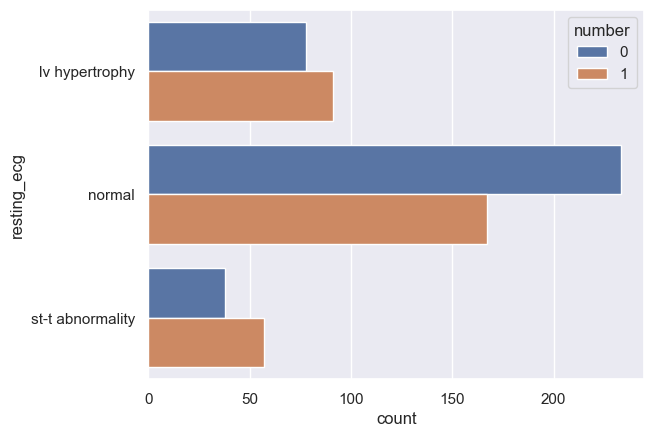

In [24]:
ecg_plot = sb.countplot(data=dataframe, y = 'resting_ecg', hue = 'number')

From the data, there is no obvious relationship between the presence of heart disease and whether one has heart disease. 

# Exploring Diabetic (Presence of diabetes) 

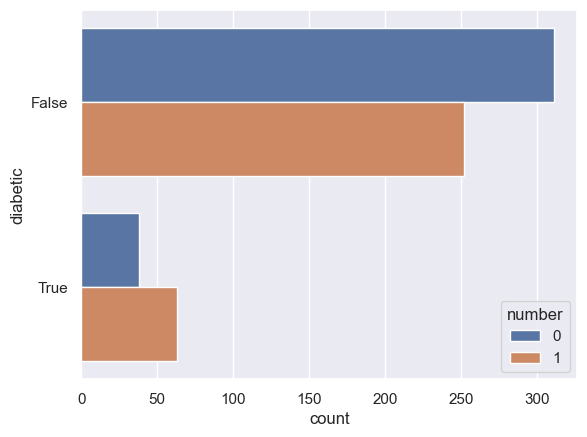

In [29]:
diabetic_plot = sb.countplot(data=dataframe, y = 'diabetic', hue = 'number')

Diabetic : The presence of diabetes - The presence of diabetes has possibility of having a relation between the presence of heart disease, where if one is diabetic, they would have a higher chance of having heart disease

# End Of EDA - Move to Machine Learning